In [1]:
# import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

Shape:  (3120, 4160)


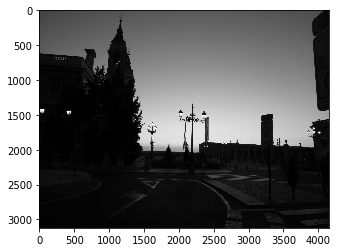

In [2]:
# read image as grayscale
img_grayscale = cv2.imread('Aufgabe11_daten/DSC_0332.JPG', 0)
img_grayscale = cv2.GaussianBlur(img_grayscale,(5,5),1.5)
print("Shape: ", img_grayscale.shape)
plt.imshow(img_grayscale, cmap='gray');

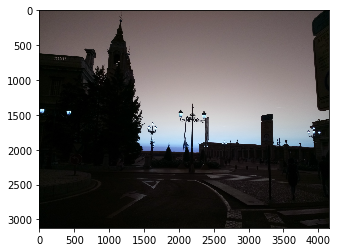

In [3]:
# read rgb image
img_rgb = cv2.imread('Aufgabe11_daten/DSC_0332.JPG')
img_rgb = cv2.GaussianBlur(img_rgb,(5,5),1.5)
plt.imshow(img_rgb);

Mean brightness:  68.06566205929487
Median brightness:  21.0


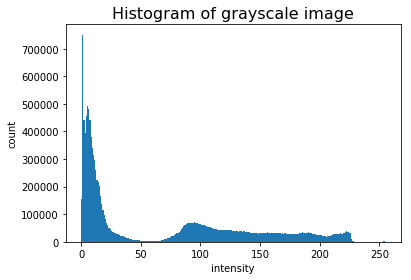

In [4]:
# histogram for grayscale image

# Calculate mean and median brightness/intensity of the pixels
print("Mean brightness: ", img_grayscale.mean())
print("Median brightness: ", np.median(img_grayscale))

# Plot the histogram
plt.xlabel('intensity')
plt.ylabel('count')
plt.title('Histogram of grayscale image', fontsize=16)
hist_flat = img_grayscale.flatten()
plt.hist(hist_flat, bins=256);

#### Take a look at the rgb channels histograms

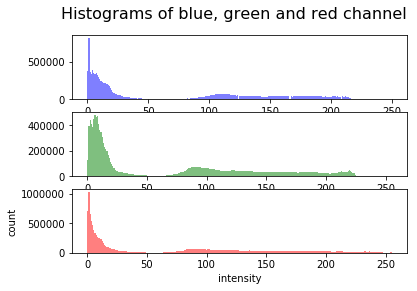

In [5]:
# Calculate histogram for all channels

# Define the colors
colors = ['b', 'g', 'r']

# Plot the histograms
fig, ax = plt.subplots(3,1)
for c in colors:
    channel = img_rgb[:,:,colors.index(c)].flatten()
    ax[colors.index(c)].hist(channel, 256, alpha = 0.5, color = c)

plt.xlabel('intensity')
plt.ylabel('count')
fig.suptitle('Histograms of blue, green and red channel', fontsize=16)
plt.savefig('rgb_histograms.png');

### Observation: 
#### Image is heavily underexposed in every channel. The half of the intensity of the pixels is below 21.

In [6]:
# Getting the lowest and highest intensity value
lowest_intensity = img_grayscale.min()
highest_intensity = img_grayscale.max()
print("Intensity range: ", lowest_intensity, "-", highest_intensity)

Intensity range:  0 - 255


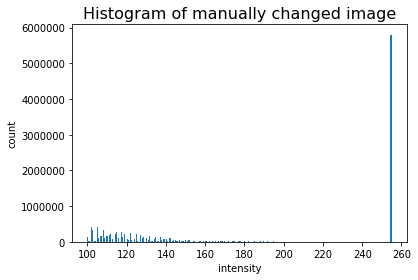

In [7]:
# Manually change brightness and contrast
contrast = 2.5 # contrast
brightness = 100   # brightness
increased_brightness_contrast = contrast*img_rgb + brightness

# Save the image
cv2.imwrite('increased_brightness_contrast.png', increased_brightness_contrast)

# Read as grayscale
img = cv2.imread('increased_brightness_contrast.png', 0)

# Plot the histogram
plt.xlabel('intensity')
plt.ylabel('count')
plt.title('Histogram of manually changed image', fontsize=16)
hist_flat = img.flatten()
plt.hist(hist_flat, bins=256);

#### Linear operations just move the problem to the other side. There are now many bright pixels.
#### Next we could try to equalize the grayscale histogram.

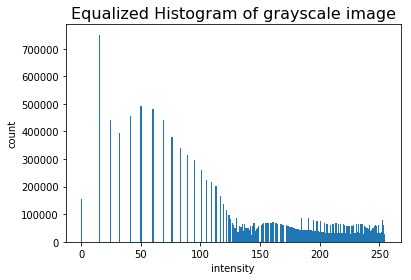

In [8]:
# Equalize histogram of grayscale image
gray_equalized = cv2.equalizeHist(img_grayscale)

# save the image
cv2.imwrite('gray_equalized.png', gray_equalized)

# plot the histogram
plt.xlabel('intensity')
plt.ylabel('count')
plt.title('Equalized Histogram of grayscale image', fontsize=16)
hist_flat = gray_equalized.flatten()
plt.hist(hist_flat, bins=256);

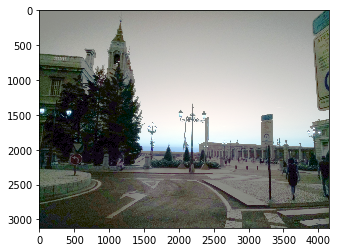

In [11]:
# Equalize histogram of single rgb channels
blue_equalized = cv2.equalizeHist(img_rgb[:,:,0])
green_equalized = cv2.equalizeHist(img_rgb[:,:,1])
red_equalized = cv2.equalizeHist(img_rgb[:,:,2])

# Merge the channels back to rgb
rgb_equalized = cv2.merge((blue_equalized, green_equalized, red_equalized))
cv2.imwrite('rgb_equalized.png', rgb_equalized);
plt.imshow(rgb_equalized);

#### Since the histograms were calculated individually, the colors seem to be distorted. A better approach may be to convert the image to HSV (Hue, Saturation, Value)

In [12]:
# RGB to HSV
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

# Equalize histogram on the Brightness (Value) channel
img_hsv[:,:,2] = cv2.equalizeHist(img_hsv[:,:,2])

# HSV to RGB
image = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)

cv2.imwrite('hsv_equalized.png', image);